2023-09-15 03:03:00.186378: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 03:03:00.829283: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.1
# GPUs Available:  1
Index(['x1', 'y1', 'MFC6', 'MFC7', 'MFC8', 'MFC9', 'MFC10', 'MFC1', 'MFC2',
       'MFC3', 'MFC4', 'MFC5'],
      dtype='object')
(359, 12)


2023-09-15 03:03:02.136967: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-15 03:03:02.165460: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-15 03:03:02.165975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_18 (Dense)            (None, 436)               4796      
                                                                 
 dense_19 (Dense)            (None, 188)               82156     
                                                                 
 dense_20 (Dense)            (None, 112)               21168     
                                                                 
 dense_21 (Dense)            (None, 160)               18080     
                                                                 
 dense_22 (Dense)            (None, 284)               45724     
                                                                 
 dense_23 (Dense)            (None, 124)               3534

2023-09-15 03:03:05.888084: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f8d00032950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-15 03:03:05.888147: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2023-09-15 03:03:05.896241: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-15 03:03:06.063110: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-09-15 03:03:06.206316: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/8 [=========================>....] - ETA: 0s - loss: 0.1220 - mae: 0.2544 
Epoch 1: val_mae improved from inf to 0.11506, saving model to best_single_model_weights.h5
8/8 [==============================] - 5s 39ms/step - loss: 0.1231 - mae: 0.2565 - val_loss: 0.0209 - val_mae: 0.1151
Epoch 2/1000
7/8 [=========================>....] - ETA: 0s - loss: 0.1192 - mae: 0.2534
Epoch 2: val_mae improved from 0.11506 to 0.10778, saving model to best_single_model_weights.h5
8/8 [==============================] - 0s 18ms/step - loss: 0.1176 - mae: 0.2531 - val_loss: 0.0185 - val_mae: 0.1078
Epoch 3/1000
7/8 [=========================>....] - ETA: 0s - loss: 0.0864 - mae: 0.2296
Epoch 3: val_mae improved from 0.10778 to 0.10483, saving model to best_single_model_weights.h5
8/8 [==============================] - 0s 18ms/step - loss: 0.0839 - mae: 0.2266 - val_loss: 0.0205 - val_mae: 0.1048
Epoch 4/1000
7/8 [=========================>....] - ETA: 0s - loss: 0.1006 - mae: 0.2378
Epoch 4: val_mae d

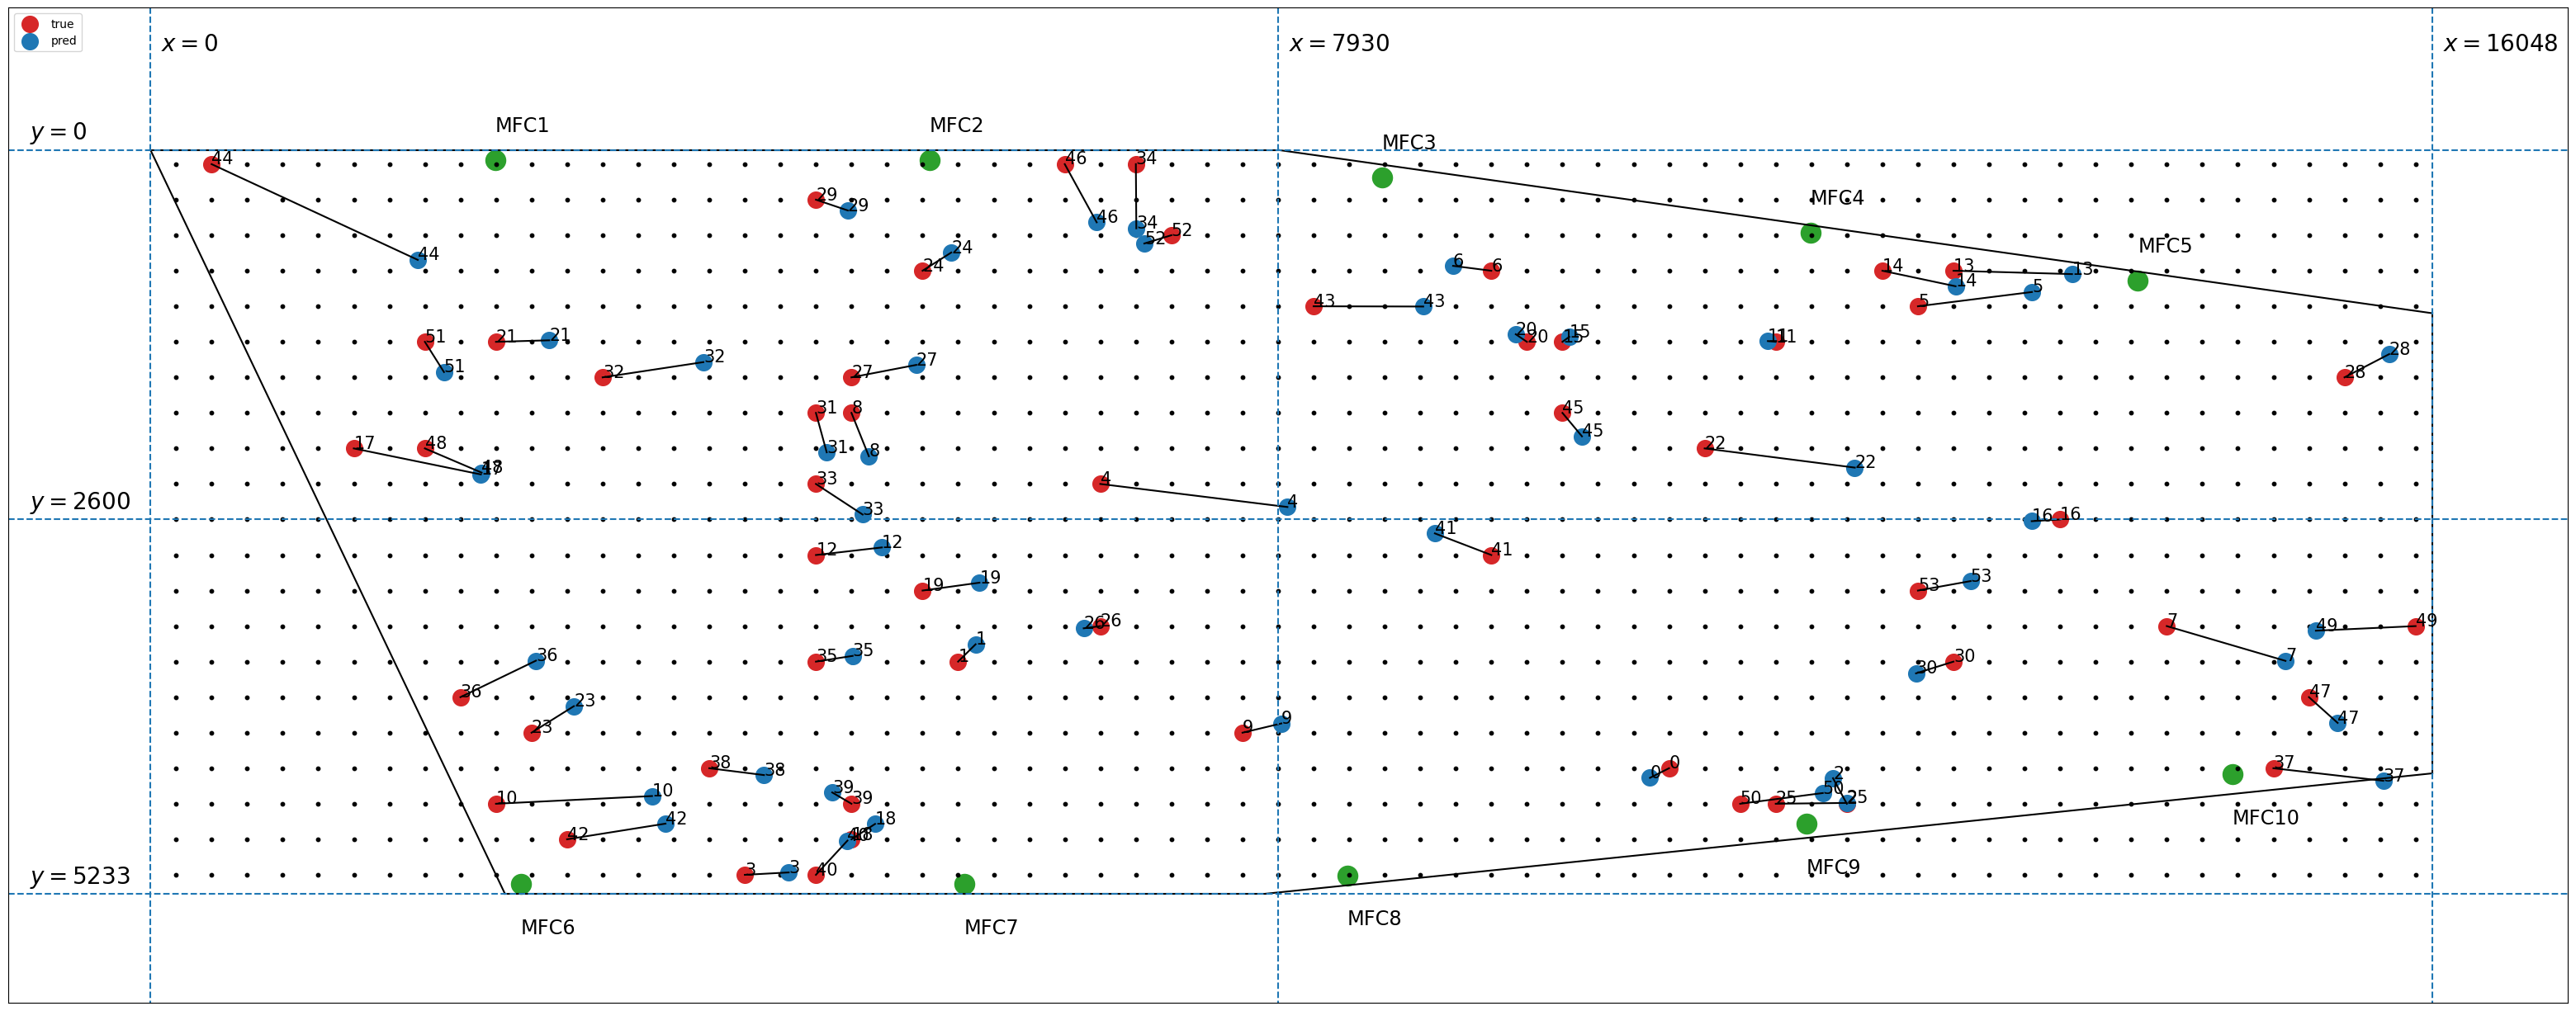

In [1]:
# %%
import tensorflow as tf
from utils.data_preprocess import load_data
from utils.module import model_eval
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from utils.model_evaluation import plot_test_pred
import pandas as pd

# Sandwiched dropout layer to the hyperparameter tuned model and did the predictions 1000 times without training the model again
# Sandwiched dropout layer to the hyperparameter tuned model and did the predictions 1000 times after training the model again
# During hyperparameter tuning, it is ensured that a dropout layer is there after a dense layer. This model is directly used for uncertainity quanitification

single_leakage, two_leakage = load_data()
# print(single_leakage.columns)
data = single_leakage.drop(columns=['total flow rate', 'mfc6_residual',
       'mfc7_residual', 'mfc8_residual', 'mfc9_residual', 'mfc10_residual',
       'mfc1_residual', 'mfc2_residual', 'mfc3_residual', 'mfc4_residual',
       'mfc5_residual'])

print(data.columns)
print(data.shape)

y = data[['x1', 'y1']]
x = data.drop(['x1', 'y1'], axis=1)

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1) 

X_train = pd.read_csv("./model_data_final_cleansed/X_train.csv", index_col=0)
X_test = pd.read_csv("./model_data_final_cleansed/X_test.csv", index_col=0)
y_train = pd.read_csv("./model_data_final_cleansed/y_train.csv", index_col=0)
y_test = pd.read_csv("./model_data_final_cleansed/y_test.csv", index_col=0)
X_val = pd.read_csv("./model_data_final_cleansed/X_val.csv", index_col=0)
y_val = pd.read_csv("./model_data_final_cleansed/y_val.csv", index_col=0)

scaler_coords = StandardScaler()
y_train = scaler_coords.fit_transform(y_train)
y_test = scaler_coords.transform(y_test)
y_val = scaler_coords.transform(y_val)

scaler_flows = StandardScaler()
X_train = scaler_flows.fit_transform(X_train)
X_test = scaler_flows.transform(X_test)
X_val = scaler_flows.transform(X_val)

# %%
dropout_prob = 0.1

model = tf.keras.models.load_model('saved_model/single_leak/single_leakage_final_cleansed')
print(model.summary())
model_evaluate, y_pred = model_eval(model, X_test, y_test, X_train, y_train, X_val, y_val)

stoch_model = tf.keras.Sequential()

for i, layer in enumerate(model.layers):
    stoch_model.add(layer)
    # Add your intermediate layer after each existing layer
    if i == 0:
        continue
    if i == len(model.layers)-1:
        continue
    intermediate_layer = tf.keras.layers.Dropout(dropout_prob)
    stoch_model.add(intermediate_layer)

# Compile the new model
stoch_model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=model.optimizer.lr.numpy()),
                loss="mse",
                metrics='mae')
# Print the summary of the new model

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='best_single_model_weights.h5',  # Filepath to save the weights
    monitor='val_mae',               # Metric to monitor for saving
    save_best_only=True,              # Save only the best model
    save_weights_only=True,           # Save only the weights (not the full model)
    mode='min',                       # Mode to minimize the monitored metric
    verbose=1                          # Verbosity level (optional)
)
stoch_model.fit(X_train, y_train, epochs=1000, 
                validation_data = (X_val, y_val), shuffle= True,
                callbacks=[checkpoint_callback])
stoch_model.summary()
model_evaluate, y_pred = model_eval(stoch_model, X_test, y_test, X_train, y_train, X_val, y_val)
# # # %%
pred=np.stack([stoch_model(X_test,training=True) 
               for sample in range(1000)])
predictions_list = pred.tolist()
predictions_list_unsc = []
# print(len(predictions_list))
for pred in predictions_list:
    pred = scaler_coords.inverse_transform(pred)
    predictions_list_unsc.append(pred)
predictions__unsc = np.array(predictions_list_unsc)

# print(predictions__unsc.shape)
pred_mean=predictions__unsc.mean(axis=0)
pred_std = predictions__unsc.std(axis=0) 
print(pred_mean, pred_std)
# # %%
y_test = scaler_coords.inverse_transform(y_test)
plot_test_pred(y_test, pred_mean)
# print(pred_std)


array([ 5.58 ,  8.349,  7.943, 15.596,  7.959,  7.965,  6.992,  3.597,
       19.405, 11.155, 16.413,  8.318, 12.139,  8.424,  8.8  ,  6.809,
        5.439, 19.776, 12.781, 10.274,  6.526, 23.973,  8.354, 16.757,
       10.665,  6.957, 11.582, 10.887,  5.492, 11.001,  7.428, 15.704,
       16.091, 14.303,  8.062, 14.242, 18.948,  4.837, 12.861, 12.188,
       14.067,  9.345, 16.926,  6.946, 28.917,  8.126,  8.98 ,  4.187,
       17.481,  3.721,  6.806, 38.231,  7.553,  9.803])

In [11]:
percent_error.transpose()[0]

array([ 5.58 ,  8.349,  7.943, 15.596,  7.959,  7.965,  6.992,  3.597,
       19.405, 11.155, 16.413,  8.318, 12.139,  8.424,  8.8  ,  6.809,
        5.439, 19.776, 12.781, 10.274,  6.526, 23.973,  8.354, 16.757,
       10.665,  6.957, 11.582, 10.887,  5.492, 11.001,  7.428, 15.704,
       16.091, 14.303,  8.062, 14.242, 18.948,  4.837, 12.861, 12.188,
       14.067,  9.345, 16.926,  6.946, 28.917,  8.126,  8.98 ,  4.187,
       17.481,  3.721,  6.806, 38.231,  7.553,  9.803])

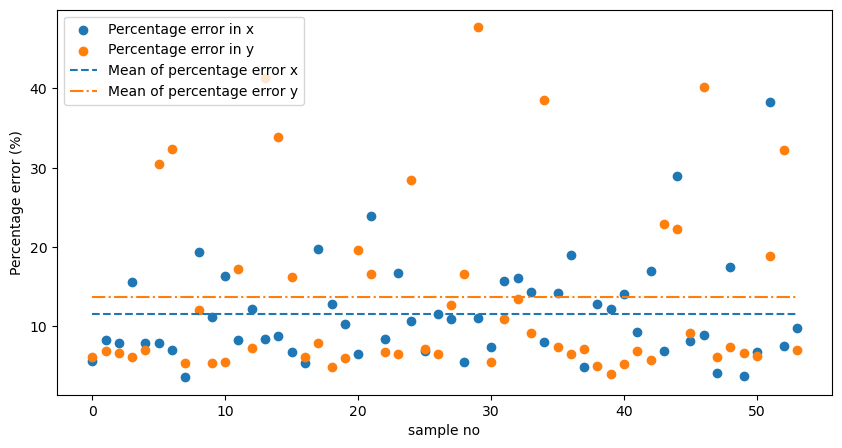

In [26]:
percent_error = (pred_std/pred_mean)*100
y_mean_x = [percent_error.transpose()[0].mean(axis=0)]*len(percent_error)
y_mean_y = [percent_error.transpose()[1].mean(axis=0)]*len(percent_error)
# ind = np.argpartition(percent_error.transpose()[0], -40)[-40:]
# top5 = percent_error[ind]
# average_of_75 = [top5.mean(axis=0)]*len(percent_error)
# percent_error
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(range(len(percent_error)),percent_error.transpose()[0], label = 'Percentage error in x')
plt.scatter(range(len(percent_error)),percent_error.transpose()[1], label = 'Percentage error in y')
plt.plot(range(len(percent_error)),y_mean_x, label='Mean of percentage error x', linestyle='--')
plt.plot(range(len(percent_error)),y_mean_y, label='Mean of percentage error y', linestyle='-.')
# plt.plot(range(len(percent_error)),average_of_75, label='75% Data', linestyle='-.', color = 'k')
plt.legend(loc="upper left")
plt.xlabel('sample no')
plt.ylabel('Percentage error (%)')
# plt.title("Distance between the Model predictions and True value", fontsize = 15)
plt.savefig('./results/single_leakage_percentage_error.png')
plt.show()

In [24]:
percent_error.transpose()[0].mean(axis=0)

11.51226183730705

In [25]:
percent_error.transpose()[1].mean(axis=0)

13.678688594799494

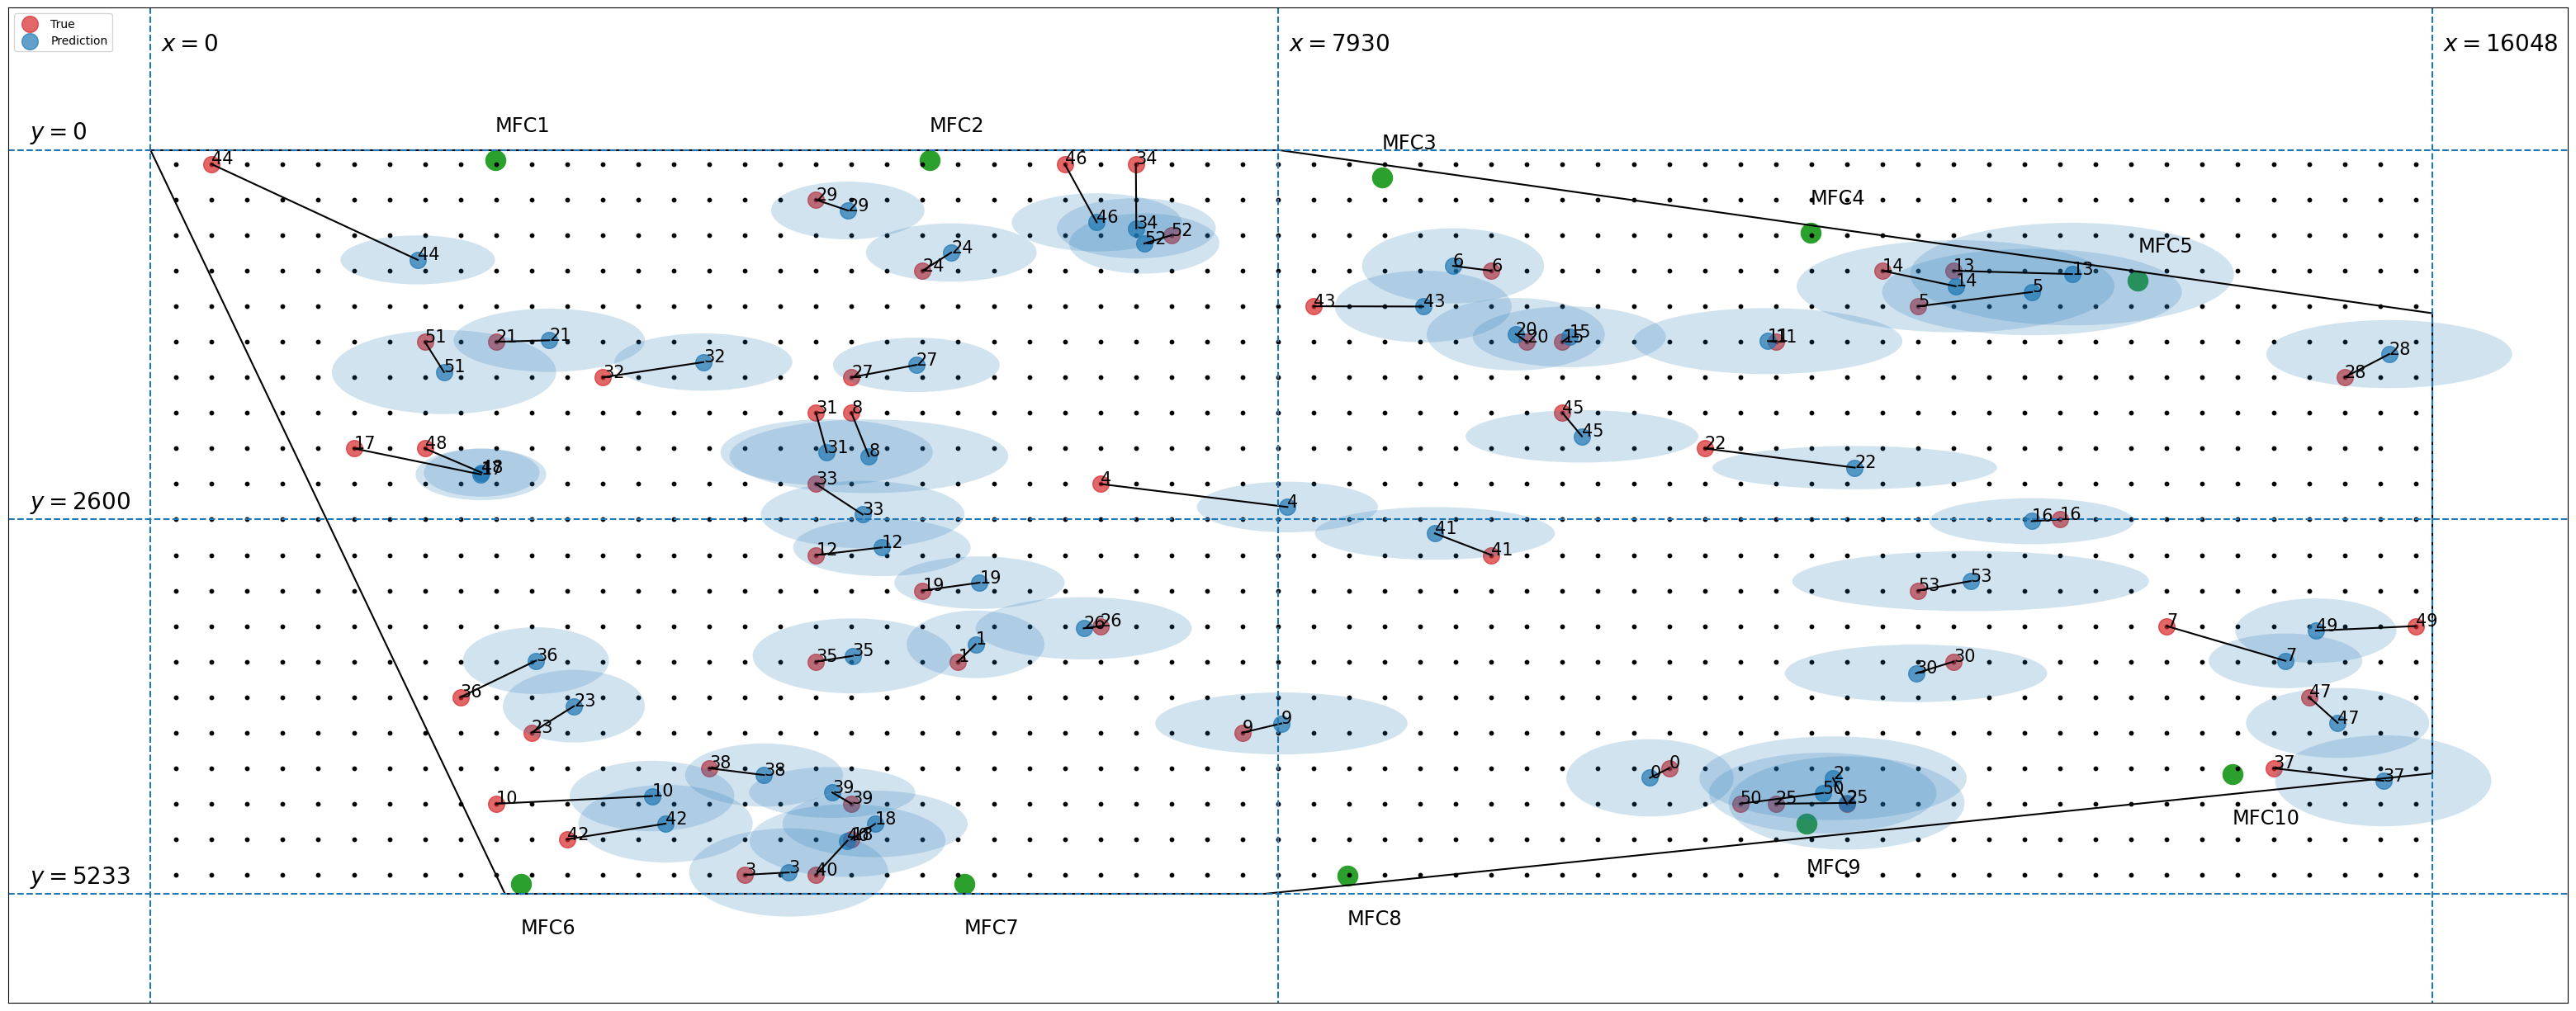

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x_range = np.arange(180, 16048, 250)
y_range = np.arange(100, 5233, 250)
X, Y = np.meshgrid(x_range, y_range)

def plot_test_pred_uncertainity(test, pred, std):
    plt.figure(figsize=(40, 20))
    
    # plt.title(f'Sample Number {sample_number}', fontsize=20)
    
    # plot sensor positions
    sensors = np.array([[2426, 70], [5480, 70], [8661, 191], [11676, 584], [13976, 917], [2603, 5163], [5723, 5163], [8417, 5103], [11646, 4740], [14641, 4391]])
    for i in range(len(sensors)):
        plt.scatter(sensors[i, 0], sensors[i, 1], color='tab:green', s=300)
        if i < 5:
            plt.text(sensors[i, 0], sensors[i, 1] - 200, 'MFC'+str(i+1), fontsize='xx-large')
        else:
            plt.text(sensors[i, 0], sensors[i, 1] + 350, 'MFC'+str(i+1), fontsize='xx-large')

    # plot leakage positions
    plt.scatter(X, Y, color='black', s=10)
    
    for i in range(len(test)):
        if i != len(test)-1:
            plt.scatter(test[i][0], test[i][1], color='tab:red', s=200, alpha= 0.7)
            plt.scatter(pred[i][0], pred[i][1], s=200, color='tab:blue', alpha= 0.7)
            line = np.vstack((test[i], pred[i])).transpose()
            plt.plot(line[0], line[1], color = 'black')
            plt.annotate(str(i), (pred[i][0], pred[i][1] + 0.2), fontsize=15)
            plt.annotate(str(i), (test[i][0], test[i][1] + 0.2), fontsize=15)
        else:
            plt.scatter(test[i][0], test[i][1], color='tab:red', s=200, label="True", alpha= 0.7)
            plt.scatter(pred[i][0], pred[i][1], s=200, color='tab:blue', label= "Prediction", alpha= 0.7)
            line = np.vstack((test[i], pred[i])).transpose()
            plt.plot(line[0], line[1], color = 'black')
            plt.annotate(str(i), (pred[i][0], pred[i][1] + 0.2), fontsize=15)
            plt.annotate(str(i), (test[i][0], test[i][1] + 0.2), fontsize=15)


    for i in range(len(pred)):
        mean_x, mean_y = pred[i][0], pred[i][1]
        sigma_x, sigma_y = std[i][0], std[i][1]

        # Plot ellipses representing uncertainty
        ellipse = patches.Ellipse((mean_x, mean_y), width=2*sigma_x, height=2*sigma_y, angle=0, alpha=0.2)
        plt.gca().add_patch(ellipse)
    plt.gca().set_aspect('equal')

    plot_wing_contour()

    # include grid coordinate system
    plt.hlines(0, -1000, 17000, linestyle='dashed')
    plt.hlines(2600, -1000, 17000, linestyle='dashed')
    plt.hlines(5233, -1000, 17000, linestyle='dashed')
    plt.vlines(0, -1000, 6000, linestyle='dashed')
    plt.vlines(7930, -1000, 6000, linestyle='dashed')
    plt.vlines(16048, -1000, 6000, linestyle='dashed')
    plt.text(-850, -75, '$y = 0$', fontsize=20)
    plt.text(-850, 2600-75, '$y = 2600$', fontsize=20)
    plt.text(-850, 5233-75, '$y = 5233$', fontsize=20)
    plt.text(75, -700, '$x=0$', fontsize=20)
    plt.text(7930+75, -700, '$x=7930$', fontsize=20)
    plt.text(16048+75, -700, '$x=16048$', fontsize=20)
    # plt.text(180, 5800, f'(x1, y1) = ({x1}, {y1}) = ({j1-31}, {-i1+10})', fontsize=20)
    plt.legend(loc="upper left")
    # invert y axis
    plt.gca().invert_yaxis()

    # lgnd = plt.legend(loc="upper left", numpoints=2, fontsize=15)

    #change the marker size manually for both lines
    # lgnd.legendHandles[0]._sizes = [30]
    # lgnd.legendHandles[1]._sizes = [30]

    # plt.savefig('./results/hypermodel_results.png')

    plt.show()

def plot_wing_contour():
    plt.plot([0, 7930], [0, 0], 'k')
    plt.plot([7930, 16048], [0, 1149], 'k')
    plt.plot([16048, 16048], [1149, 4386], 'k')
    plt.plot([16048, 7843], [4386, 5233], 'k')
    plt.plot([7843, 2493], [5233, 5233], 'k')
    plt.plot([2493, 0], [5233, 0], 'k')
    plt.xlim([-1000, 17000])
    plt.ylim([-1000, 6000])
    plt.xticks([])
    plt.yticks([])
    plt.gca().set_aspect('equal')

plot_test_pred_uncertainity(y_test, pred_mean, pred_std)

In [3]:
import numpy as np

# Assuming you have the following data
# predictions__unsc = np.random.rand(1000, 117, 2)

# Calculate the mean of each sample across the 1000 readings
sample_means = np.mean(predictions__unsc, axis=0)  # Shape: (117, 2)

# Initialize an array to store L2 distances
l2_distances = np.zeros((sample_means.shape[0],))

# Calculate L2 distances
for j in range(sample_means.shape[0]):
    diff = predictions__unsc[:, j] - sample_means[j]
    distances = np.sqrt(np.sum(diff ** 2, axis=-1))
    ind = np.argpartition(distances, -5)[-5:]
    top5 = distances[ind]
    
    # l2_distances[j] = np.mean(distances)
    l2_distances[j] = top5.mean()

# l2_distances is a NumPy array of shape (117,) containing the mean L2 distances
# where l2_distances[j] represents the mean L2 distance between the mean of sample j and its corresponding 1000 readings

# Verify the shape of l2_distances
print(l2_distances)

[ 2548.824  2169.283  8460.4    2364.22   4388.529  3328.948  3789.962
  2086.179  3383.069  2449.15   2283.205  3290.319  2417.591  4945.948
  3483.793  2726.765  4959.472  2218.764  2704.59   2763.371  2348.897
  2016.845  4098.638  2011.008  2050.826  4997.701  2760.761  2252.435
  2655.415  2563.254  7059.385  3489.954  2342.797  2967.722  2528.071
  2333.312  3010.219  2477.582  2652.197  2072.365  2838.006  3359.933
  2456.366  2595.507  2142.484  2842.91   2747.929  2744.34   1538.489
  2115.362  5516.351  2913.319  2131.757 10118.746]


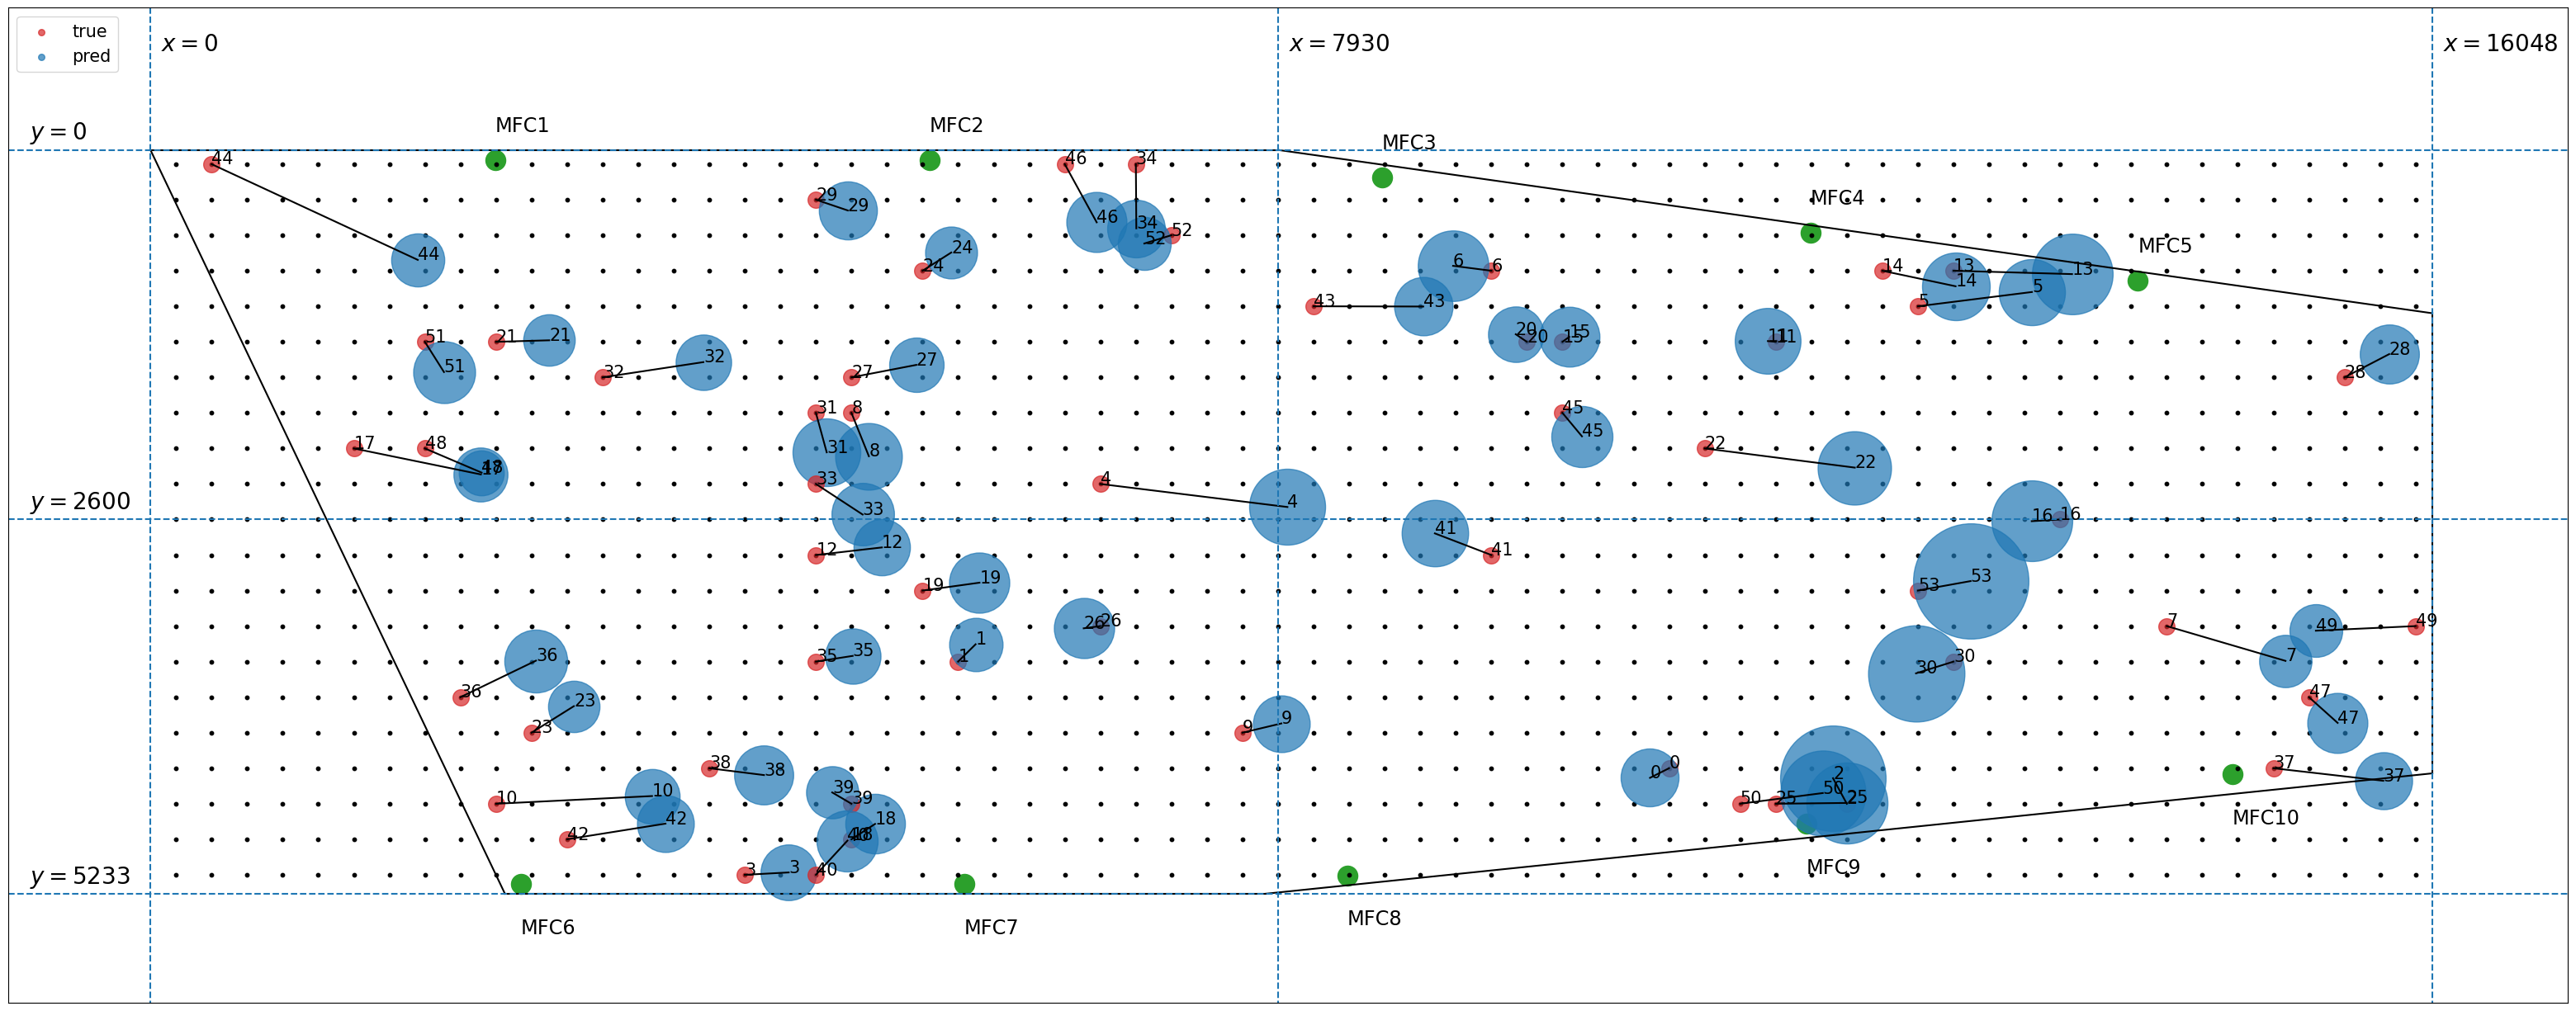

In [4]:
import matplotlib.pyplot as plt

x_range = np.arange(180, 16048, 250)
y_range = np.arange(100, 5233, 250)
X, Y = np.meshgrid(x_range, y_range)

def plot_test_pred_uncertainity(test, pred, radius):
    plt.figure(figsize=(40, 20))
    
    # plt.title(f'Sample Number {sample_number}', fontsize=20)
    
    # plot sensor positions
    sensors = np.array([[2426, 70], [5480, 70], [8661, 191], [11676, 584], [13976, 917], [2603, 5163], [5723, 5163], [8417, 5103], [11646, 4740], [14641, 4391]])
    for i in range(len(sensors)):
        plt.scatter(sensors[i, 0], sensors[i, 1], color='tab:green', s=300)
        if i < 5:
            plt.text(sensors[i, 0], sensors[i, 1] - 200, 'MFC'+str(i+1), fontsize='xx-large')
        else:
            plt.text(sensors[i, 0], sensors[i, 1] + 350, 'MFC'+str(i+1), fontsize='xx-large')

    # plot leakage positions
    plt.scatter(X, Y, color='black', s=10)
    # radius = radius.tolist()
    
    for i in range(len(test)):
        if i != len(test)-1:
            plt.scatter(test[i][0], test[i][1], color='tab:red', s=200, alpha= 0.7)
            plt.scatter(pred[i][0], pred[i][1], s=radius[i], color='tab:blue', alpha= 0.7)
            line = np.vstack((test[i], pred[i])).transpose()
            plt.plot(line[0], line[1], color = 'black')
            plt.annotate(str(i), (pred[i][0], pred[i][1] + 0.2), fontsize=15)
            plt.annotate(str(i), (test[i][0], test[i][1] + 0.2), fontsize=15)
        else:
            plt.scatter(test[i][0], test[i][1], color='tab:red', s=200, label="true", alpha= 0.7)
            plt.scatter(pred[i][0], pred[i][1], s=radius[i], color='tab:blue', label="pred", alpha= 0.7)
            line = np.vstack((test[i], pred[i])).transpose()
            plt.plot(line[0], line[1], color = 'black')
            plt.annotate(str(i), (pred[i][0], pred[i][1] + 0.2), fontsize=15)
            plt.annotate(str(i), (test[i][0], test[i][1] + 0.2), fontsize=15)

    # print(X.shape)
    legend = plt.legend(loc='upper right')
    # legend.legendHandles[0]._legmarker.set_markersize(15)
    # legend.legendHandles[0]._legmarker.set_alpha(1)
    # plot wing contour
    plot_wing_contour()

    # include grid coordinate system
    plt.hlines(0, -1000, 17000, linestyle='dashed')
    plt.hlines(2600, -1000, 17000, linestyle='dashed')
    plt.hlines(5233, -1000, 17000, linestyle='dashed')
    plt.vlines(0, -1000, 6000, linestyle='dashed')
    plt.vlines(7930, -1000, 6000, linestyle='dashed')
    plt.vlines(16048, -1000, 6000, linestyle='dashed')
    plt.text(-850, -75, '$y = 0$', fontsize=20)
    plt.text(-850, 2600-75, '$y = 2600$', fontsize=20)
    plt.text(-850, 5233-75, '$y = 5233$', fontsize=20)
    plt.text(75, -700, '$x=0$', fontsize=20)
    plt.text(7930+75, -700, '$x=7930$', fontsize=20)
    plt.text(16048+75, -700, '$x=16048$', fontsize=20)
    # plt.text(180, 5800, f'(x1, y1) = ({x1}, {y1}) = ({j1-31}, {-i1+10})', fontsize=20)
    plt.legend(loc="upper left")
    # invert y axis
    plt.gca().invert_yaxis()

    lgnd = plt.legend(loc="upper left", numpoints=2, fontsize=15)

    #change the marker size manually for both lines
    lgnd.legendHandles[0]._sizes = [30]
    lgnd.legendHandles[1]._sizes = [30]

    # plt.savefig('./results/hypermodel_results.png')

    plt.show()

def plot_wing_contour():
    plt.plot([0, 7930], [0, 0], 'k')
    plt.plot([7930, 16048], [0, 1149], 'k')
    plt.plot([16048, 16048], [1149, 4386], 'k')
    plt.plot([16048, 7843], [4386, 5233], 'k')
    plt.plot([7843, 2493], [5233, 5233], 'k')
    plt.plot([2493, 0], [5233, 0], 'k')
    plt.xlim([-1000, 17000])
    plt.ylim([-1000, 6000])
    plt.xticks([])
    plt.yticks([])
    plt.gca().set_aspect('equal')



plot_test_pred_uncertainity(y_test, pred_mean, l2_distances)

In [5]:
# import matplotlib.pyplot as plt

# x_range = np.arange(180, 16048, 250)
# y_range = np.arange(100, 5233, 250)
# X, Y = np.meshgrid(x_range, y_range)

# def plot_test_pred_uncertainity(test, pred):
#     plt.figure(figsize=(40, 20))
    
#     # plt.title(f'Sample Number {sample_number}', fontsize=20)
    
#     # plot sensor positions
#     sensors = np.array([[2426, 70], [5480, 70], [8661, 191], [11676, 584], [13976, 917], [2603, 5163], [5723, 5163], [8417, 5103], [11646, 4740], [14641, 4391]])
#     for i in range(len(sensors)):
#         plt.scatter(sensors[i, 0], sensors[i, 1], color='tab:green', s=300)
#         if i < 5:
#             plt.text(sensors[i, 0], sensors[i, 1] - 200, 'MFC'+str(i+1), fontsize='xx-large')
#         else:
#             plt.text(sensors[i, 0], sensors[i, 1] + 350, 'MFC'+str(i+1), fontsize='xx-large')

#     # plot leakage positions
#     plt.scatter(X, Y, color='black', s=10)
    
#     for i in range(len(test)):
#         if i != len(test)-1:
#             plt.scatter(test[i][0], test[i][1], color='tab:red', s=200, alpha= 0.7)
#             plt.scatter(pred[i][0], pred[i][1], s=200, color='tab:blue', alpha= 0.7)
#             plt.errorbar(test[i][0], test[i][1], xerr=pred_std[i][0], yerr=pred_std[i][1], fmt='o', color='tab:grey', capsize=4)
#             line = np.vstack((test[i], pred[i])).transpose()
#             plt.plot(line[0], line[1], color = 'black')
#             plt.annotate(str(i), (pred[i][0], pred[i][1] + 0.2), fontsize=15)
#             plt.annotate(str(i), (test[i][0], test[i][1] + 0.2), fontsize=15)
#         else:
#             plt.scatter(test[i][0], test[i][1], color='tab:red', s=200, label="True", alpha= 0.7)
#             plt.scatter(pred[i][0], pred[i][1], s=200, color='tab:blue', label= "Prediction", alpha= 0.7)
#             plt.errorbar(test[i][0], test[i][1], xerr=pred_std[i][0], yerr=pred_std[i][1], fmt='o', color='tab:grey', capsize=4, label='Uncertainty')
#             line = np.vstack((test[i], pred[i])).transpose()
#             plt.plot(line[0], line[1], color = 'black')
#             plt.annotate(str(i), (pred[i][0], pred[i][1] + 0.2), fontsize=15)
#             plt.annotate(str(i), (test[i][0], test[i][1] + 0.2), fontsize=15)

#     # print(X.shape)
#     # legend = plt.legend(loc='upper right')
#     # legend.legendHandles[0]._legmarker.set_markersize(15)
#     # legend.legendHandles[0]._legmarker.set_alpha(1)
#     # plot wing contour
#     plot_wing_contour()

#     # include grid coordinate system
#     plt.hlines(0, -1000, 17000, linestyle='dashed')
#     plt.hlines(2600, -1000, 17000, linestyle='dashed')
#     plt.hlines(5233, -1000, 17000, linestyle='dashed')
#     plt.vlines(0, -1000, 6000, linestyle='dashed')
#     plt.vlines(7930, -1000, 6000, linestyle='dashed')
#     plt.vlines(16048, -1000, 6000, linestyle='dashed')
#     plt.text(-850, -75, '$y = 0$', fontsize=20)
#     plt.text(-850, 2600-75, '$y = 2600$', fontsize=20)
#     plt.text(-850, 5233-75, '$y = 5233$', fontsize=20)
#     plt.text(75, -700, '$x=0$', fontsize=20)
#     plt.text(7930+75, -700, '$x=7930$', fontsize=20)
#     plt.text(16048+75, -700, '$x=16048$', fontsize=20)
#     # plt.text(180, 5800, f'(x1, y1) = ({x1}, {y1}) = ({j1-31}, {-i1+10})', fontsize=20)
#     plt.legend(loc="upper left")
#     # invert y axis
#     plt.gca().invert_yaxis()

#     # lgnd = plt.legend(loc="upper left", numpoints=2, fontsize=15)

#     #change the marker size manually for both lines
#     # lgnd.legendHandles[0]._sizes = [30]
#     # lgnd.legendHandles[1]._sizes = [30]

#     plt.savefig('./results/hypermodel_results.png')

#     plt.show()

# def plot_wing_contour():
#     plt.plot([0, 7930], [0, 0], 'k')
#     plt.plot([7930, 16048], [0, 1149], 'k')
#     plt.plot([16048, 16048], [1149, 4386], 'k')
#     plt.plot([16048, 7843], [4386, 5233], 'k')
#     plt.plot([7843, 2493], [5233, 5233], 'k')
#     plt.plot([2493, 0], [5233, 0], 'k')
#     plt.xlim([-1000, 17000])
#     plt.ylim([-1000, 6000])
#     plt.xticks([])
#     plt.yticks([])
#     plt.gca().set_aspect('equal')


# plot_test_pred_uncertainity(y_test, pred_mean)